# **1.discover our dataset:**

###**Context**
**artist:** Name of the Artist.

**song:**Name of the Track.

**popularity:** The higher the value the more popular the song is.

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration in milliseconds:**Time of the song

**time_signature:** a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

**Class:**Genre of the track.

# **First step: Exploratory Data Analysis – EDA :**

IMPORT LIBRARIES

In [ ]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

**READING** THE DATA

In [ ]:
data=pd.read_csv("train.csv")

## **Basic Data Exploration**

**1- head of the dataset**

In [ ]:
data.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4,1


2-The shape of the dataset

In [ ]:
data.shape

(14396, 18)

**3-Info of the dataset & Know the datatypes**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

***Discussion:***
***
I have two catigorical columns must to dealing with them

## **Descover Missing value**

1-Check amount of missing values

In [ ]:
data.isnull().sum() / data.shape[0]*100

id                     0.000000
Artist Name            0.000000
Track Name             0.000000
Popularity             2.438177
danceability           0.000000
energy                 0.000000
key                   11.197555
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.722145
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

***Discussion:***
***
I have three columns have missing values 

## **Duplicate values**

In [ ]:
data.duplicated().sum() #try without id

0

In [ ]:
data2=data.drop("id",axis=1)


In [ ]:
data2.duplicated().sum()

0

In [ ]:
data3=data.drop(["id","Artist Name","Track Name"],axis=1)

In [ ]:
data3.duplicated().sum()

29

In [ ]:
data

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.80900,0.000006,0.2360,0.8020,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.41600,NaN,0.1160,0.6880,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.04870,0.021500,0.1160,0.7840,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.83400,NaN,0.0963,0.3240,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.51700,0.106000,0.1640,0.5100,71.548,200173.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.0,0.140,0.159,1.0,-17.845,0,0.0401,0.86700,0.917000,0.3920,0.0331,142.239,4.052667,3,7
14392,14392,Citizen Cope,Something to Believe In,50.0,0.659,0.882,5.0,-7.039,1,0.0527,0.04620,0.011500,0.0919,0.8810,156.099,221840.000000,4,10
14393,14393,WurlD,WAYO (KPE LE WU),41.0,0.696,0.535,4.0,-8.053,0,0.1460,0.42100,0.000018,0.1070,0.6620,91.943,196093.000000,4,9
14394,14394,Rafferty,Making a Home,48.0,0.412,0.571,11.0,-6.006,1,0.0387,0.30400,NaN,0.2370,0.4730,159.697,238173.000000,4,9



**Discussion:**
***
In this dataset there are no duplicated values ,so we can ignore the processing steps of duplicated data

## **Analysis Data and Visulization**

**1.Histograms for numerical attributes**

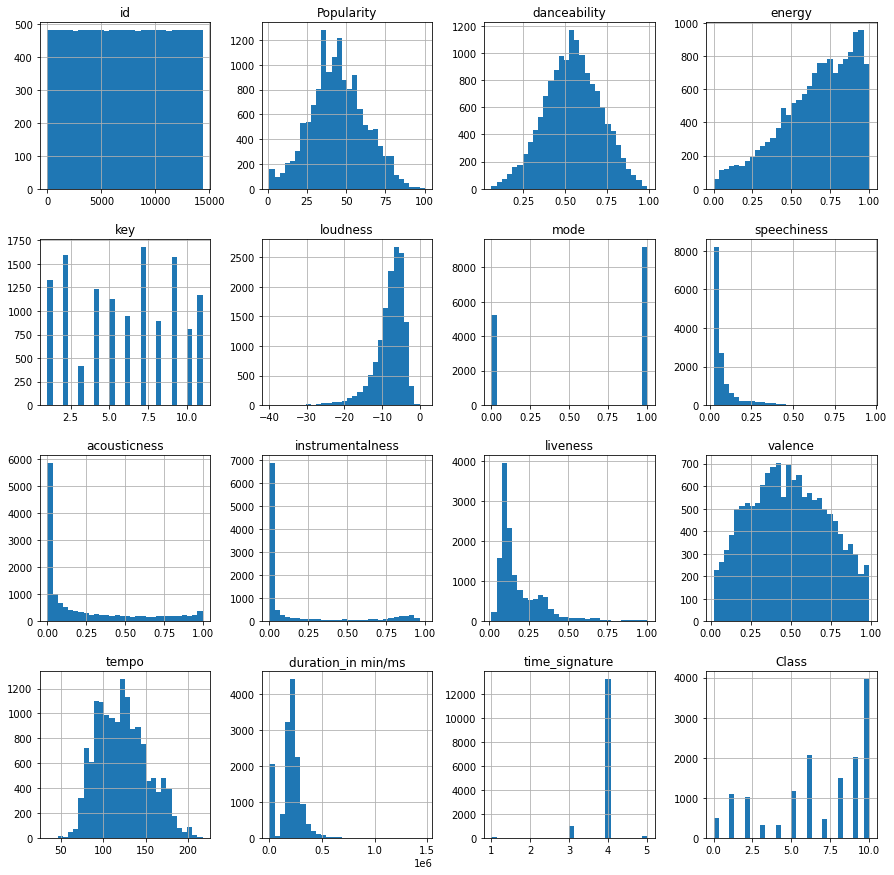

In [ ]:
#Plot histogram for all for each numerical attribute 
data.hist(bins=30, figsize=(15,15))
plt.show()

In [ ]:
data.columns

Index(['id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

**Discussion:**
***
By analysis every numerical attribute:

**1-ID** have to be deleted 

**2-popularity** : [0-100]  with almost normal distribution

**3-danceability** : [0-100] with almost normal distribution

**4-energy** : [0-1]

**5-key** : categorecal [1,11] c,c#....

**6-Loudness**: [-39.9 , 1.3] 

**7-mode**: categorecal [0,1] 0:minor/1:major

**8-speachiness** : [0,1]
*   > 0.66  :  totaly speach
*   < 0.66   &   > 0.33 : mix of speach and music
*   < 0.33 : totaly music

**9-acousticness** : confidence measure [0,1] 

**10-instrumentalness**: [0,1]
*   > 0.5 : tend to be by instruments
*   < 0.5 : tend to be human vocal 

**11-liveness** : [0.1] live if >0.8 

**12-valence**: [0,1] happy/high sad/low

**13-tempo**:BPM [30.0 , 217.4]

**14-duration**:time [0.5 , 1.4 e6]

**15-time_signature**:calegorical [1.5]







2.scatter matrix plots every numerical attribute

**3.look for correlations among the features**

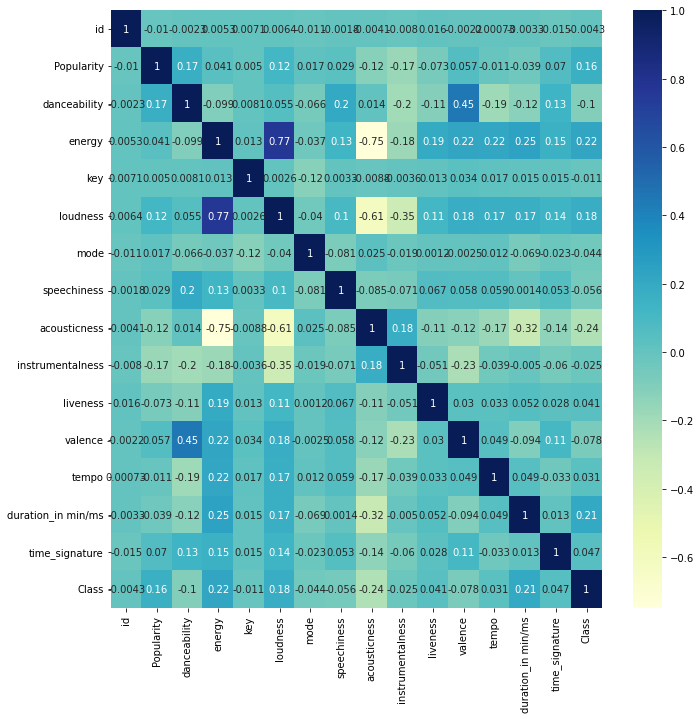

In [ ]:

plt.figure(figsize=(11, 11))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Discussion:**
***
we can notice that:

- "energy" correlated with "loudness" with 0.77

- "energy" correlated with "acousticeness" with -0.75

- "acousticeness" correlated with "loudness" -0.61


***
There is a correlation between energy &  loudness-acousticeness

In [ ]:
corr_matrix = data.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.221837
duration_in min/ms    0.205521
loudness              0.179647
Popularity            0.159977
time_signature        0.047389
liveness              0.041245
tempo                 0.031248
id                   -0.004332
key                  -0.010587
instrumentalness     -0.025039
mode                 -0.043674
speechiness          -0.055894
valence              -0.078111
danceability         -0.101228
acousticness         -0.241062
Name: Class, dtype: float64

**4.discover categorical values of columns**

**Notice:**
***
As we see when we discover the data by info function ,there are three columns have categorical values ,so we have to discover these columns

In [ ]:
#Artist Name column
data["Artist Name"].value_counts()

Backstreet Boys                  59
Westlife                         48
Britney Spears                   43
Eyal Golan                       42
Omer Adam                        34
                                 ..
Luz                               1
Ammonia                           1
Velvet Two Stripes                1
Mahendra Kapoor, Manhar Udhas     1
WurlD                             1
Name: Artist Name, Length: 7891, dtype: int64

In [ ]:
#Track Name column
data["Track Name"].value_counts()

Dreams                              8
Hurricane                           7
Forever                             7
Runaway                             7
Fire                                7
                                   ..
El Sicuri                           1
Like a Hurricane - 2003 Remaster    1
Necrogenic Resurrection             1
Love's Gonna Live Here              1
Is There Anybody out There?         1
Name: Track Name, Length: 12396, dtype: int64

## - discover all features

In [ ]:
data["danceability"].describe()

count    14396.000000
mean         0.542981
std          0.166668
min          0.059600
25%          0.430000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64

## Discover the Classes

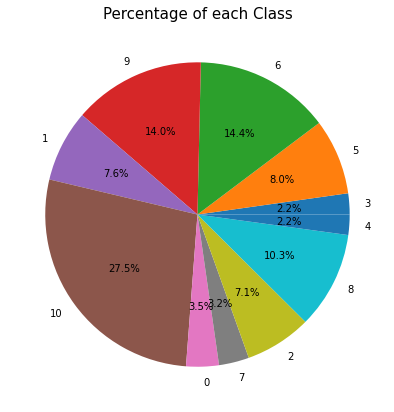

In [ ]:
#extarct the information
data2=data["Class"]
k3=data["Class"].unique()

g=[ (k3[i],data[data2==k3[i]].shape[0])  for i in range(len(k3)) ]

labels2,groups2=zip(*g)

# Create a pieplot
plt.figure(figsize=(7,7))

plt.pie(x=groups2, autopct="%.1f%%", labels=labels2, pctdistance=0.6)
plt.title("Percentage of each Class", fontsize=15);
plt.show()

**Discussion:**
***
The labels are imbalance and lead to bais to some class more than others, need to handle this

Descover distrebution:

In [ ]:
df_cont = data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in id = 0.0
Skewness in Popularity = 0.08006994251562351
Skewness in danceability = -0.08229455923966875
Skewness in energy = -0.6670626095486724
Skewness in key = -0.0583807351306382
Skewness in loudness = -1.7776077950622011
Skewness in mode = -0.5769824559099634
Skewness in speechiness = 3.0807581102048154
Skewness in acousticness = 1.106557986566441
Skewness in instrumentalness = 1.5330483684237448
Skewness in liveness = 2.180116661982887
Skewness in valence = 0.09330389122311882
Skewness in tempo = 0.3805001787090443
Skewness in duration_in min/ms = 0.8308030445786988
Skewness in time_signature = -4.216940650892727
Skewness in Class = -0.6665628522172123


**Discussion:**
***
If skewness is in between -0.5 and 0.5, the data is  normally distributed so far.

Descover Outliers

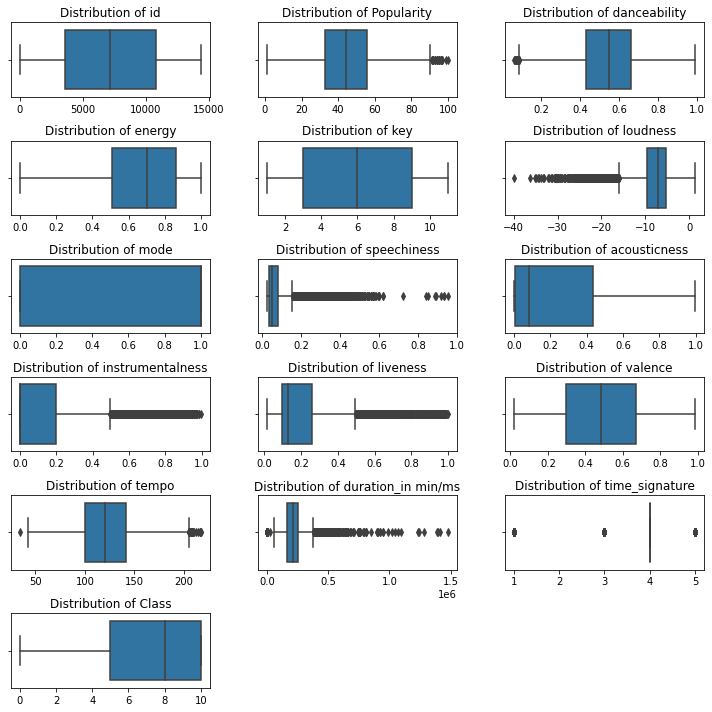

In [ ]:
df_cont = data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [ ]:
data["duration_in min/ms"].describe()

count    1.439600e+04
mean     2.009550e+05
std      1.118463e+05
min      5.339167e-01
25%      1.669988e+05
50%      2.095845e+05
75%      2.522970e+05
max      1.477187e+06
Name: duration_in min/ms, dtype: float64

In [ ]:
data1=data

## Split to training and testing sets:

split train/test datasets having equal classes proportion & shuffle data

In [ ]:
X=data1.drop("Class",axis=1)
y=data1["Class"]

In [ ]:
 X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0,test_size=0.2, stratify=y, shuffle=True)

In [ ]:
y_train.value_counts()

10    3167
6     1655
9     1615
8     1186
5      926
1      878
2      814
0      400
7      369
3      258
4      248
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

10    792
6     414
9     404
8     297
5     231
1     220
2     204
0     100
7      92
3      64
4      62
Name: Class, dtype: int64

In [ ]:
data["Class"].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

resampling data

In [ ]:
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import TomekLinks
#resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
#X_train, y_train = resample.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(11516, 17)

In [ ]:
# concatenate our training data back together
data1 = pd.concat([X_train, y_train], axis=1)

In [ ]:

from sklearn.utils import shuffle
data1 = shuffle(data1)
data1.reset_index(inplace=True, drop=True)

## **Prepare the Data for Machine Learning Algorithms**


## A- Data Cleaning

**missing values**

In [ ]:
#Popularity
mean_pop=data1["Popularity"].mean()
data1=data1.fillna({"Popularity":mean_pop})

In [ ]:
#key
from statistics import mode
mode_key=mode(data1["key"])
data1=data1.fillna({"key":mode_key})

In [ ]:
#instrumentalness
mean_instrumen=data1["instrumentalness"].mean()
data1=data1.fillna({"instrumentalness":mean_instrumen})

In [ ]:
data1.isna().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

## B-Remove outliers

In [ ]:
data1.columns

Index(['id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

## C-Handling Text and Categorical Attributes

In [ ]:
data1=data1.drop(['id', 'Artist Name','Track Name'],axis=1)
data1.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,70.0,0.427,0.666,5.0,-7.902,0,0.0415,0.17600,0.229000,0.0856,0.232,85.022,215771.0,4,9
1,69.0,0.510,0.696,4.0,-10.830,1,0.0802,0.01570,0.000104,0.2970,0.905,176.568,359733.0,4,10
2,71.0,0.562,0.383,6.0,-15.474,1,0.0304,0.14300,0.124000,0.1380,0.599,93.764,206760.0,3,10
3,43.0,0.537,0.823,9.0,-5.874,1,0.0322,0.00784,0.000002,0.1220,0.759,132.241,151827.0,4,2
4,34.0,0.752,0.568,2.0,-8.235,0,0.0893,0.14000,0.180179,0.1270,0.511,102.090,195294.0,4,9


## D-handle formating issues

In [ ]:
data4=data1

In [ ]:
# Filter all the rows that have duration value less than "30"
data4.loc[(data4['duration_in min/ms'] <  1000)]['duration_in min/ms']

9        3.893933
18       2.826450
21       2.799983
30       5.462400
36       6.282617
           ...   
11502    4.838217
11503    2.248217
11508    7.080000
11509    2.979783
11512    4.145833
Name: duration_in min/ms, Length: 1658, dtype: float64

In [ ]:
condition = data1['duration_in min/ms'] 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
#data1.loc[condition,'duration_in min/ms'] = data1.loc[condition,'duration_in min/ms']*60000

In [ ]:
data1['duration_in min/ms']=data1['duration_in min/ms']/1000

In [ ]:
data1["duration_in min/ms"].describe()

count    11516.000000
mean       200.920519
std        111.529496
min          0.000534
25%        167.000000
50%        209.837000
75%        252.939750
max       1477.187000
Name: duration_in min/ms, dtype: float64

## D- Feature Scaling

handle with correlated features

In [ ]:
data1=data1.drop(['key'],axis=1)

In [ ]:
data1["loudness"]=data1["loudness"]*-1

## E- Standerazation

In [ ]:
Musice_features=data1.drop("Class",axis=1)
Musice_class=data1["Class"]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# CODE HERE
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

Music_num_tr = num_pipeline.fit_transform(Musice_features)
Music_num_tr

array([[ 1.48508927, -0.69677226,  0.01581594, ..., -1.2675512 ,
         0.13315873,  0.2056719 ],
       [ 1.42680678, -0.19958859,  0.1430519 , ...,  1.84209063,
         1.42401232,  0.2056719 ],
       [ 1.54337176,  0.11189998, -1.18444335, ..., -0.97060224,
         0.05236045, -2.59068887],
       ...,
       [ 0.2611569 , -0.41523452,  0.5586894 , ...,  0.60286715,
        -0.30594598,  0.2056719 ],
       [-0.14682056,  0.34551641,  0.61382498, ...,  0.26091049,
         0.87119285,  0.2056719 ],
       [ 0.20287441, -2.0505495 ,  1.3348288 , ...,  0.40265928,
         0.68839022,  0.2056719 ]])

In [ ]:
Music_prepared=Music_num_tr

# 4- Create a Test Set and Train Set

In [ ]:
train_set=Music_num_tr
test_set=pd.read_csv("test.csv")

In [ ]:
Music_num_tr.shape

(11516, 13)

# 5- Select and Train a Model

In [ ]:
try1=Music_prepared[1]
try1

array([ 1.42680678, -0.19958859,  0.1430519 ,  0.726279  ,  0.74960996,
        0.01519021, -0.74518904, -0.67769343,  0.63602474,  1.73807412,
        1.84209063,  1.42401232,  0.2056719 ])

In [ ]:
Music_prepared.shape

(11516, 13)

In [ ]:
data1.head(2)

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,70.0,0.427,0.666,7.902,0,0.0415,0.1760,0.229000,0.0856,0.232,85.022,215.771,4,9
1,69.0,0.510,0.696,10.830,1,0.0802,0.0157,0.000104,0.2970,0.905,176.568,359.733,4,10


1-SVM

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(Music_prepared, Musice_class) 
svm_clf.predict([try1])

array([10])

In [ ]:
Musice_class[1]

10

Validation

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(svm_clf, Music_prepared, Musice_class, cv=10, scoring="f1_macro")

array([0.54769631, 0.56240684, 0.53109956, 0.54666471, 0.54360515,
       0.51560121, 0.5298638 , 0.52872701, 0.52965765, 0.54126558])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_1 = cross_val_predict(svm_clf, Music_prepared, Musice_class, cv=3)
conf_mx = confusion_matrix(Musice_class, y_train_pred_1)
conf_mx

array([[ 306,    0,    2,   25,   29,    1,    0,    9,    0,   19,    9],
       [   0,    5,   22,    0,    0,   38,  138,    2,   24,   90,  559],
       [   1,    0,  253,    0,    0,   17,   59,    0,    9,   95,  380],
       [  53,    0,    1,  168,   16,    1,    0,   10,    0,    6,    3],
       [  58,    0,    0,    4,  150,    0,    0,    0,    0,   22,   14],
       [   1,    0,   14,    0,    0,  636,   30,    0,    5,  143,   97],
       [   0,    6,   49,    0,    0,   95,  340,    1,   51,  219,  894],
       [  31,    0,    0,    4,    4,    0,    1,  328,    0,    0,    1],
       [   0,    0,    1,    0,    0,    2,   31,    0,  501,   10,  641],
       [  42,    0,   52,    4,   28,  141,   69,    0,    3,  854,  422],
       [  15,    0,   94,    4,   54,   35,  130,    1,  205,  241, 2388]])

In [ ]:
conf_mx.shape

(11, 11)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.60      0.77      0.67       400
           1       0.45      0.01      0.01       878
           2       0.52      0.31      0.39       814
           3       0.80      0.65      0.72       258
           4       0.53      0.60      0.57       248
           5       0.66      0.69      0.67       926
           6       0.43      0.21      0.28      1655
           7       0.93      0.89      0.91       369
           8       0.63      0.42      0.51      1186
           9       0.50      0.53      0.52      1615
          10       0.44      0.75      0.56      3167

    accuracy                           0.51     11516
   macro avg       0.59      0.53      0.53     11516
weighted avg       0.52      0.51      0.48     11516



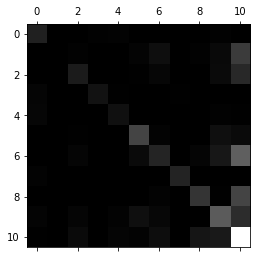

In [ ]:
# CODE HERE
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

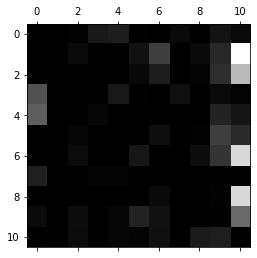

In [ ]:
# CODE HERE
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

2-Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [ ]:
forest_clf.fit(Music_prepared, Musice_class)
forest_clf.predict([try1])

array([10])

In [ ]:
Musice_class[1]

10

validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, Music_prepared, Musice_class, cv=3, scoring="f1_macro")

array([0.56326992, 0.54067881, 0.54348175])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_2 = cross_val_predict(forest_clf, Music_prepared, Musice_class, cv=3)
conf_mx = confusion_matrix(Musice_class, y_train_pred_2)
conf_mx

array([[ 312,    0,    0,   20,   27,    0,    0,   13,    0,   26,    2],
       [   0,   20,   30,    0,    0,   35,  301,    0,   31,   63,  398],
       [   0,    6,  272,    0,    0,   13,   90,    0,    8,   89,  336],
       [  49,    0,    0,  182,    6,    0,    0,   10,    0,    9,    2],
       [  57,    0,    0,    3,  148,    0,    0,    0,    0,   27,   13],
       [   0,    5,   15,    0,    0,  643,   43,    0,    1,  142,   77],
       [   0,  170,   56,    0,    0,   82,  405,    0,   44,  182,  716],
       [  19,    0,    0,   11,    0,    0,    0,  338,    0,    0,    1],
       [   0,    2,    4,    0,    0,    0,   37,    0,  601,    7,  535],
       [  34,   10,   42,    4,   12,  153,  119,    0,    4,  874,  363],
       [  15,   93,   95,   10,   34,   41,  249,    1,  285,  228, 2116]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, y_train_pred_2))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       400
           1       0.07      0.02      0.03       878
           2       0.53      0.33      0.41       814
           3       0.79      0.71      0.75       258
           4       0.65      0.60      0.62       248
           5       0.66      0.69      0.68       926
           6       0.33      0.24      0.28      1655
           7       0.93      0.92      0.92       369
           8       0.62      0.51      0.56      1186
           9       0.53      0.54      0.54      1615
          10       0.46      0.67      0.55      3167

    accuracy                           0.51     11516
   macro avg       0.57      0.55      0.55     11516
weighted avg       0.49      0.51      0.49     11516



3-KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(Music_prepared, Musice_class)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
neigh.predict([try1])

array([10])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(neigh, Music_prepared, Musice_class, cv=10, scoring="f1_macro")

array([0.51634001, 0.54679849, 0.49472219, 0.50780906, 0.51209947,
       0.51596974, 0.49848964, 0.4940242 , 0.51801941, 0.50601521])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_3 = cross_val_predict(neigh, Music_prepared, Musice_class, cv=3)
conf_mx = confusion_matrix(Musice_class, y_train_pred_3)
conf_mx

array([[ 288,    0,    7,   22,   35,    0,    4,   11,    2,   23,    8],
       [   0,   69,   33,    0,    0,   37,  176,   18,   53,   85,  407],
       [   7,   39,  270,    2,    0,   15,   94,    2,   27,  101,  257],
       [  55,    0,    3,  153,   13,    5,    2,   12,    0,   10,    5],
       [  57,    1,    0,    8,  147,    0,    0,    0,    0,   17,   18],
       [   1,   15,   21,    0,    0,  609,   61,    2,   14,  118,   85],
       [   4,  122,   93,    1,    1,   84,  384,   20,  109,  186,  651],
       [  32,    0,    0,    2,    4,    0,    4,  326,    0,    0,    1],
       [   0,   15,   14,    0,    0,    2,   69,    1,  542,   13,  530],
       [  42,   54,   83,    6,   32,  157,  148,    0,   20,  726,  347],
       [  25,  121,  159,    9,   46,   45,  349,    1,  365,  270, 1777]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, y_train_pred_3))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       400
           1       0.16      0.08      0.11       878
           2       0.40      0.33      0.36       814
           3       0.75      0.59      0.66       258
           4       0.53      0.59      0.56       248
           5       0.64      0.66      0.65       926
           6       0.30      0.23      0.26      1655
           7       0.83      0.88      0.86       369
           8       0.48      0.46      0.47      1186
           9       0.47      0.45      0.46      1615
          10       0.43      0.56      0.49      3167

    accuracy                           0.46     11516
   macro avg       0.50      0.51      0.50     11516
weighted avg       0.44      0.46      0.45     11516



4-Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier()
GB_clf.fit(Music_prepared, Musice_class,)
GB_clf.score(Music_prepared, Musice_class)

0.6336401528308441

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_4 = cross_val_predict(GB_clf, Music_prepared, Musice_class, cv=3)
conf_mx = confusion_matrix(Musice_class, y_train_pred_4)
conf_mx

array([[ 291,    0,    0,   36,   35,    0,    0,   16,    0,   20,    2],
       [   0,   14,   41,    0,    0,   39,  204,    0,   46,   78,  456],
       [   0,    5,  308,    0,    0,   16,   81,    0,   10,   92,  302],
       [  55,    0,    0,  178,    8,    2,    0,   10,    0,    4,    1],
       [  54,    0,    0,    4,  160,    0,    0,    2,    0,   20,    8],
       [   0,    4,   22,    0,    0,  644,   47,    0,    1,  143,   65],
       [   0,   48,   64,    0,    0,   80,  471,    0,   66,  163,  763],
       [  19,    0,    0,   15,    1,    0,    0,  334,    0,    0,    0],
       [   0,    1,    5,    0,    0,    2,   37,    0,  618,    8,  515],
       [  32,    3,   49,    6,   17,  143,  112,    0,    6,  901,  346],
       [  21,   22,  142,   12,   31,   43,  224,    0,  294,  249, 2129]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, y_train_pred_4))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       400
           1       0.14      0.02      0.03       878
           2       0.49      0.38      0.43       814
           3       0.71      0.69      0.70       258
           4       0.63      0.65      0.64       248
           5       0.66      0.70      0.68       926
           6       0.40      0.28      0.33      1655
           7       0.92      0.91      0.91       369
           8       0.59      0.52      0.56      1186
           9       0.54      0.56      0.55      1615
          10       0.46      0.67      0.55      3167

    accuracy                           0.53     11516
   macro avg       0.56      0.55      0.55     11516
weighted avg       0.50      0.53      0.50     11516



In [ ]:
GB_clf.predict([try1])

array([10])

5-XGBooster:

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB_clr=XGBClassifier()
scores = cross_val_score(XGB_clr, Music_prepared, Musice_class, scoring='f1_macro')

In [ ]:
scores

array([0.56120649, 0.5514389 , 0.541128  , 0.54886477, 0.54230275])

In [ ]:
y_train_pred_23 = cross_val_predict(XGB_clr, Music_prepared, Musice_class, cv=3)
conf_mx = confusion_matrix(Musice_class, y_train_pred_23)
conf_mx

array([[ 290,    0,    0,   31,   41,    0,    0,   18,    0,   17,    3],
       [   0,    5,   39,    0,    0,   43,  183,    0,   50,   73,  485],
       [   0,    1,  288,    0,    0,   23,   77,    0,    8,   88,  329],
       [  48,    0,    0,  184,    9,    0,    0,   13,    0,    4,    0],
       [  56,    0,    0,    3,  163,    0,    0,    0,    0,   15,   11],
       [   0,    1,   15,    0,    0,  677,   29,    0,    1,  127,   76],
       [   0,    6,   64,    0,    0,   96,  455,    0,   69,  162,  803],
       [  19,    0,    0,   11,    0,    0,    0,  339,    0,    0,    0],
       [   0,    0,    2,    0,    0,    0,   38,    0,  638,    8,  500],
       [  38,    2,   46,    9,   26,  166,   92,    0,    7,  861,  368],
       [  19,    0,  142,   12,   37,   49,  170,    0,  282,  243, 2213]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, y_train_pred_23))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       400
           1       0.33      0.01      0.01       878
           2       0.48      0.35      0.41       814
           3       0.74      0.71      0.72       258
           4       0.59      0.66      0.62       248
           5       0.64      0.73      0.68       926
           6       0.44      0.27      0.34      1655
           7       0.92      0.92      0.92       369
           8       0.60      0.54      0.57      1186
           9       0.54      0.53      0.54      1615
          10       0.46      0.70      0.56      3167

    accuracy                           0.53     11516
   macro avg       0.58      0.56      0.55     11516
weighted avg       0.52      0.53      0.50     11516



6- OVR-XGBooster

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(Music_prepared, Musice_class)


OneVsRestClassifier(estimator=XGBClassifier())

In [ ]:
xbg_predictions_labels = xgb_classifier.predict(Music_prepared)

In [ ]:
conf_mx = confusion_matrix(Musice_class, xbg_predictions_labels)
conf_mx

array([[ 344,    0,    0,   13,   19,    0,    0,    9,    0,   12,    3],
       [   0,    9,   31,    0,    0,   37,  192,    0,   44,   74,  491],
       [   0,    0,  361,    0,    0,   12,   71,    0,    7,   71,  292],
       [  24,    0,    0,  218,    8,    0,    0,    4,    0,    4,    0],
       [  25,    0,    0,    1,  209,    0,    0,    0,    0,    8,    5],
       [   0,    0,   14,    0,    0,  713,   27,    0,    1,  109,   62],
       [   0,    0,   55,    0,    0,   83,  546,    0,   58,  150,  763],
       [   6,    0,    0,    7,    0,    0,    0,  356,    0,    0,    0],
       [   0,    0,    2,    0,    0,    1,   31,    0,  690,   10,  452],
       [  22,    0,   44,    1,   14,  139,   79,    0,    5,  982,  329],
       [  15,    1,   95,    6,   18,   44,  139,    0,  219,  205, 2425]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, xbg_predictions_labels))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       400
           1       0.90      0.01      0.02       878
           2       0.60      0.44      0.51       814
           3       0.89      0.84      0.87       258
           4       0.78      0.84      0.81       248
           5       0.69      0.77      0.73       926
           6       0.50      0.33      0.40      1655
           7       0.96      0.96      0.96       369
           8       0.67      0.58      0.62      1186
           9       0.60      0.61      0.61      1615
          10       0.50      0.77      0.61      3167

    accuracy                           0.60     11516
   macro avg       0.72      0.64      0.63     11516
weighted avg       0.63      0.60      0.57     11516



7-OVO_XGBooster

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
#from xgboost import OneVsOneClassifier
xgb_classifier1 = OneVsOneClassifier(XGBClassifier(probability=True))
xgb_classifier1.fit(Music_prepared, Musice_class)

OneVsOneClassifier(estimator=XGBClassifier(probability=True))

In [ ]:
xbg_predictions_labels2 = xgb_classifier1.predict(Music_prepared)

In [ ]:
conf_mx = confusion_matrix(Musice_class, xbg_predictions_labels2)
conf_mx

array([[ 372,    0,    0,    4,    7,    0,    0,    3,    0,   11,    3],
       [   0,   21,   35,    0,    0,   30,  185,    0,   44,   61,  502],
       [   0,    0,  404,    0,    0,    9,   62,    0,    3,   62,  274],
       [  15,    0,    0,  237,    6,    0,    0,    0,    0,    0,    0],
       [  12,    0,    0,    0,  230,    0,    0,    0,    0,    4,    2],
       [   0,    0,   10,    0,    0,  723,   31,    0,    1,   91,   70],
       [   0,    3,   56,    0,    0,   49,  610,    0,   59,  127,  751],
       [   1,    0,    0,    0,    1,    0,    0,  367,    0,    0,    0],
       [   0,    0,    2,    0,    0,    0,   23,    0,  724,    7,  430],
       [  10,    0,   38,    0,    9,  112,   88,    0,    5, 1023,  330],
       [   4,    0,   87,    2,    7,   32,  145,    0,  201,  171, 2518]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Musice_class, xbg_predictions_labels2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       400
           1       0.88      0.02      0.05       878
           2       0.64      0.50      0.56       814
           3       0.98      0.92      0.95       258
           4       0.88      0.93      0.91       248
           5       0.76      0.78      0.77       926
           6       0.53      0.37      0.44      1655
           7       0.99      0.99      0.99       369
           8       0.70      0.61      0.65      1186
           9       0.66      0.63      0.65      1615
          10       0.52      0.80      0.63      3167

    accuracy                           0.63     11516
   macro avg       0.77      0.68      0.68     11516
weighted avg       0.66      0.63      0.60     11516



8-NN

9-DNN

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# CODE HERE
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [ 4, 6]},
{'bootstrap': [True], 'n_estimators': [50,100], 'max_features': [2, 3, 4,6]},
]

forest_clf1= RandomForestClassifier()

grid_search1 = GridSearchCV(forest_clf1, param_grid, cv=5,scoring='f1_macro',return_train_score=True)

grid_search1.fit(Music_prepared, Musice_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [4, 6], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [50, 100]}],
             return_train_score=True, scoring='f1_macro')

In [ ]:
grid_search1.fit(Music_prepared, Musice_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [4, 6], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [50, 100]}],
             return_train_score=True, scoring='f1_macro')

In [ ]:
grid_search1.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100}

In [ ]:
feature_importances = grid_search1.best_estimator_.feature_importances_
feature_importances

array([0.08628609, 0.08989773, 0.08719928, 0.0828832 , 0.01237234,
       0.10388324, 0.10919321, 0.08482527, 0.06315389, 0.08418208,
       0.06455398, 0.12534468, 0.00622502])

In [ ]:
name_colo=data1.columns
name_colo

Index(['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [ ]:
sorted(zip(feature_importances, name_colo), reverse=True)

[(0.12534467516753986, 'duration_in min/ms'),
 (0.10919320797659134, 'acousticness'),
 (0.10388323551025205, 'speechiness'),
 (0.0898977322345408, 'danceability'),
 (0.08719927537359652, 'energy'),
 (0.08628608768608219, 'Popularity'),
 (0.08482526736848098, 'instrumentalness'),
 (0.08418208414925786, 'valence'),
 (0.0828831968068267, 'loudness'),
 (0.06455398265693081, 'tempo'),
 (0.06315389160569863, 'liveness'),
 (0.012372338913620575, 'mode'),
 (0.006225024550581671, 'time_signature')]

In [ ]:
y_train_pred_12 = cross_val_predict(grid_search1, Music_prepared, Musice_class, cv=3)

Ensemble Learning 

In [ ]:

from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
estimators=[('Gb', GB_clf), ('rf', grid_search1), ('svc', svm_clf),("XGB",XGB_clr),('knn',neigh),("ovr_XGB",xgb_classifier)],
voting='soft')
voting_clf.fit(Music_prepared, Musice_class)

VotingClassifier(estimators=[('Gb', GradientBoostingClassifier()),
                             ('rf',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(),
                                           param_grid=[{'max_features': [4, 6],
                                                        'n_estimators': [3, 10,
                                                                         30]},
                                                       {'bootstrap': [True],
                                                        'max_features': [2, 3,
                                                                         4, 6],
                                                        'n_estimators': [50,
                                                                         100]}],
                                           return_train_score=True,
                                           scoring='f1_macro')),
   

In [ ]:
y_train_pred_14 = cross_val_predict(voting_clf, Music_prepared, Musice_class, cv=3)

In [ ]:
Music_prepared.shape

(11516, 13)

In [ ]:
Musice_class.shape

(11516,)

In [ ]:
print(classification_report(Musice_class, y_train_pred_14))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       400
           1       0.16      0.01      0.02       878
           2       0.54      0.36      0.43       814
           3       0.77      0.71      0.74       258
           4       0.62      0.64      0.63       248
           5       0.66      0.71      0.69       926
           6       0.40      0.24      0.30      1655
           7       0.93      0.92      0.93       369
           8       0.62      0.49      0.55      1186
           9       0.53      0.55      0.54      1615
          10       0.46      0.73      0.57      3167

    accuracy                           0.53     11516
   macro avg       0.58      0.56      0.55     11516
weighted avg       0.51      0.53      0.50     11516



# second level of voting 



In [ ]:
voting_clf1 = VotingClassifier(
estimators=[("ovr_XGB",xgb_classifier),("ovo_XGB",xgb_classifier1),("vot",voting_clf)],
voting='hard')
voting_clf1.fit(Music_prepared, Musice_class)

VotingClassifier(estimators=[('ovr_XGB',
                              OneVsRestClassifier(estimator=XGBClassifier())),
                             ('ovo_XGB',
                              OneVsOneClassifier(estimator=XGBClassifier(probability=True))),
                             ('vot',
                              VotingClassifier(estimators=[('Gb',
                                                            GradientBoostingClassifier()),
                                                           ('rf',
                                                            GridSearchCV(cv=5,
                                                                         estimator=RandomForestClassifier(),
                                                                         param_grid=[{'max_features': [4,
                                                                                                       6],
                                                                                    

In [ ]:
from sklearn.model_selection import cross_val_score
y_train_pred_122 = cross_val_predict(voting_clf1, Music_prepared, Musice_class, cv=3)

In [ ]:
print(classification_report(Musice_class, y_train_pred_122))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       400
           1       0.17      0.00      0.01       878
           2       0.52      0.37      0.43       814
           3       0.78      0.73      0.75       258
           4       0.62      0.63      0.62       248
           5       0.66      0.72      0.69       926
           6       0.43      0.27      0.33      1655
           7       0.93      0.93      0.93       369
           8       0.61      0.51      0.56      1186
           9       0.55      0.54      0.54      1615
          10       0.46      0.72      0.56      3167

    accuracy                           0.54     11516
   macro avg       0.58      0.56      0.56     11516
weighted avg       0.51      0.54      0.51     11516



# Evaluate the System on the Test Set

1-get the predictors and the labels from your test set

In [ ]:
test_set=pd.read_csv("test.csv")
test_set.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0,Pale Waves,She's My Religion,52.0,0.522,0.726,4.0,-4.115,1,0.0383,0.348000,0.000005,0.1480,0.331,161.867,189587.0,4
1,1,Mungo Jerry,In the Summertime,69.0,0.754,0.449,4.0,-14.013,1,0.0615,0.724000,NaN,0.1620,0.973,82.751,211880.0,4
2,2,Buddy Holly & The Crickets,Maybe Baby,50.0,0.607,0.477,9.0,-12.904,1,0.0333,0.708000,NaN,0.2530,0.887,136.614,122600.0,4
3,3,Superheaven,Life In a Jar,40.0,0.484,0.872,1.0,-5.586,1,0.0559,0.000384,0.000672,0.1480,0.347,150.027,222208.0,4
4,4,HARDY,GIVE HEAVEN SOME HELL,64.0,0.639,0.843,11.0,-4.975,1,0.0362,0.052500,NaN,0.0854,0.528,126.047,217802.0,4


In [ ]:

final_model=voting_clf1
test_set1 = test_set.copy()




In [ ]:
test_set1=X_test
test_label=y_test

In [ ]:
test_set1.shape

(2880, 17)

### A- Data Cleaning:

In [ ]:
#Popularity
mean_pop_test=test_set1["Popularity"].mean()
test_set1=test_set1.fillna({"Popularity":mean_pop_test})

In [ ]:
#key
from statistics import mode
mode_key_test=mode(test_set1["key"])
test_set1=test_set1.fillna({"key":mode_key})

In [ ]:
#instrumentalness
mean_instrumen_test=test_set1["instrumentalness"].mean()
test_set1=test_set1.fillna({"instrumentalness":mean_instrumen_test})

B-feature engineering;

In [ ]:
test_set1['duration_in min/ms']=test_set1['duration_in min/ms']/1000

In [ ]:
test_set1["loudness"]=test_set1["loudness"]*-1

In [ ]:
test_set1=test_set1.drop(['id', 'Artist Name', 'Track Name',"key"],axis=1)
test_set1.head()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6741,16.0,0.393,0.321,12.376,0,0.0345,0.43000,0.166608,0.0865,0.129,175.770,211.000000,3
1759,52.0,0.326,0.932,4.909,1,0.0506,0.07330,0.725000,0.2930,0.397,143.927,338.869000,4
8877,64.0,0.395,0.397,7.556,1,0.0368,0.73500,0.166608,0.1100,0.303,70.568,0.004746,4
9073,70.0,0.451,0.889,2.693,1,0.2610,0.00167,0.002150,0.2580,0.586,131.073,153.800000,4
3591,70.0,0.928,0.322,10.334,0,0.0838,0.22100,0.000004,0.1150,0.468,109.999,245.621000,4


C- Scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# CODE HERE
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

Music_num_tr_test = num_pipeline.fit_transform(test_set1)
Music_num_tr_test

array([[-1.65284114, -0.89783416, -1.47307944, ...,  1.71732042,
         0.08759287, -2.79598832],
       [ 0.40740839, -1.30256753,  1.123346  , ...,  0.65491442,
         1.21813719,  0.20753513],
       [ 1.09415823, -0.88575257, -1.15011981, ..., -1.79262641,
        -1.77790608,  0.20753513],
       ...,
       [-0.56548722, -0.56559035, -1.7917896 , ..., -0.12016186,
         1.15610574,  0.20753513],
       [ 2.124283  , -1.14550682,  1.03410716, ...,  0.7919065 ,
         0.19345127,  0.20753513],
       [-1.0805496 ,  0.34656994, -2.3229732 , ..., -0.72398135,
        -0.10526516,  0.20753513]])

# check the result

In [ ]:
final_predictions = final_model.predict(Music_num_tr_test)


In [ ]:
print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.84      0.37      0.51       100
           1       1.00      0.01      0.02       220
           2       0.49      0.42      0.45       204
           3       0.41      0.81      0.55        64
           4       1.00      0.02      0.03        62
           5       0.66      0.68      0.67       231
           6       0.45      0.32      0.37       414
           7       0.97      0.85      0.91        92
           8       0.69      0.33      0.44       297
           9       0.50      0.51      0.50       404
          10       0.44      0.77      0.56       792

    accuracy                           0.50      2880
   macro avg       0.68      0.46      0.46      2880
weighted avg       0.58      0.50      0.47      2880



In [ ]:
test_set.shape

(3600, 17)

In [ ]:
pred=pd.DataFrame({"id":test_set["id"],"class":final_predictions})

In [ ]:
pred.to_csv("submission.csv",index=False)